<a href="https://colab.research.google.com/github/yhy0519/Machine_learning_of_R/blob/main/R06_01_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**■ R 을 활용한 머신러닝 1장**  

1장 : 기계학습에 대한 소개  
2장 : 3장부터 소개될 머신러닝 데이터 분석시 필요한 R 명령어와 그래프, 함수소개  
3장 : knn 머신러닝 ….

▦ 데이터 분석 모형

 1. 통계기반 분석 모형  
     1) 기술 통계 : 평균, 분산, 표준편차, 왜도, 첨도, 빈도 등에 대한 대표적인 통계적 수치를 가지고 분석  
     2) 상관 분석 : 둘 또는 여러 변수 사이에 연관관계를 분석  
     3) 회귀 분석 : 하나 이상의 독립변수들이 종속변수에 미치는 영향을 추정할 수 있는 통계기법  
     4) 분산 분석 : 두 개 이상의 집단간 비교를 수행할 때 집단 내의 분산의 비교로 얻은 분포를 이용하여 가설검정을 수행하는 방법  
     5) 주성분 분석 : 많은 변수의 분산 방식의 패턴을 간결하게 표현하는 주성분 변수를 원래 변수의 선형 결합으로 추출하는 통계기법  
     6) 판별 분석 : 집단에 대한 정보로 부터 집단을 구별할 수 있는 판별 규칙을 만들고 다변량 기법으로 조사된 집단에 대한 정보를 활용하여  
     새로운 개체가 어떤 집단인지 탐색하는 통계기법
			
 2. 데이터 마이닝 기반 분석 모형

 3. 머신러닝 기반 분석 모형

         데이터  ----------------->  컴퓨터  ----------------->  예측 (회귀)
						분류
											
    - 지도학습 : 지도학습은 정답인 레이블(label) 이 포함되어 있는 학습 데이터를 통해 컴퓨터를 학습시키는 방법
				
		  예) knn (3장), 나이브 베이즈 (4장), 의사결정트리와 랜덤포레스트 (5장)
			     신경망과 서포트 벡터머신 (7장), 회귀분석 (6장)
			
	- 비지도학습 : 입력 데이터에 대한 정답인 레이블(label) 이 없는 상태에서 데이터가 어떻게 구성되었는지 알아내는 기계학습 방법
					
		  예) k-means (9장)
			
	- 강화학습 : 환경에 대해 적응해 나가는 경험 데이터를 쌓으면서 학습해 나가는 기계학습 방법
				
		  예) 딥마인드의 알파고

**■ R 을 활용한 머신러닝 2장**

머신러닝 데이터 분석을 위한 R 기본 문법, 그래프, 함수를 소개

 1. Factor 가 무엇인지 ?
 2. 이원 교차표 (CrossTable)
 3. 데이터를 R 로 불러오는 여러가지 방법

**■ 1. Factor 가 무엇인지 ?**

** R 의 자료구조
 1. vector : 같은 데이터 타입을 갖는 1차원 배열구조  
    예:  c() 함수를 이용해서 구성할 수 있다.




In [1]:
a <-  c(1, 2, 3, 4, 5)
str(a)

 num [1:5] 1 2 3 4 5


 2. matrix : 같은 데이터 타입을 갖는 2차원 배열구조
 3.  array  : 같은 데이터 타입을 갖는 다차원 배열구조
 4. data frame : rdbms 의 테이블과 같이 행과 열로 이루어진 자료구조
 5. list : 서로 다른 데이터 구조의 중첩된 구조


▦ factor (책 69 page)

     팩터(factor) 란 범주 변수나 순위 변수를 나타내기 위해 사용하는 특별한 종류의 벡터(vector) 이다.

머신러닝 데이터 분석시 factor 를 알아야하는 이유 ?

	순위 데이터를 모델링하는 머신러닝 알고리즘은 순서 팩터를 기대하기 때문에 팩터를 알아야 합니다.

예제: 팩터 = 일반 벤터 + level

예:

In [2]:
a <- c("middle", "low", "high")  # 벡터를 생성함
a       
str(a) 

[1] "middle" "low"    "high"

 chr [1:3] "middle" "low" "high"


In [3]:
a2 <- factor(a)
a2       
str(a2)  

[1] middle low    high  
Levels: high low middle

 Factor w/ 3 levels "high","low","middle": 3 2 1


설명: 팩터는 백터와는 다르게 순서라는 개념이 들어가 있는데 위의 a2 팩터의 경우
	순서가 알파벳 순서(abcd 순서) 로 순서의 개념이 들어가 있습니다.

In [4]:
order(a2, decreasing=F)

[1] 3 2 1

In [5]:
a2[order(a2, decreasing=F)]

[1] high   low    middle
Levels: high low middle

In [6]:
a[order(a, decreasing=F)]

[1] "high"   "low"    "middle"

factor 를 이용하면 우리가 생각하는 low, middle, high 순서로 만들 수 있다.  
우리가 생각하는 low, middle, high 순서로 순서를 부여해서 a3 factor 를 구성한다.

In [8]:
a3 <- factor( a, order=TRUE, level=c("low", "middle", 'high') )
a3
str(a3)

[1] middle low    high  
Levels: low < middle < high

 Ord.factor w/ 3 levels "low"<"middle"<..: 2 1 3


Levels: low < middle < high  <---  이렇게 순서를 부여할 수 있어서 머신러닝 모델 학습 시킬때 어떤게 높고 낮은지 즉 어떤게 좋고 나쁜지 어떤게 악성이고 어떤게 양성인지를 알려주면서 머신러닝 모델을 학습 시켜야 학습이 됩니다.


**■ Factor 란 ?**

 1. 범주(값의 목록) 를 갖는 vector
 2. factor() 함수를 통해서 생성
 3. factor 는 nominal, ordinal 형식 2가지가 존재합니다.
 4. nominal 은 level 순서의 값이 무의미하며 알파벳 순서로 정의됨  

예:

In [9]:
a <- c("middle", "low", "high") 
a 
str(a)   

[1] "middle" "low"    "high"

 chr [1:3] "middle" "low" "high"


 5. ordinal 은 level 순서의 값을 직접 정의해서 원하는 순서를 정하는 것임  
 
예:

In [10]:
a3 <- factor( a, order=TRUE, level=c("low", "meddle", 'high') )
a3
str(a3)

[1] <NA> low  high
Levels: low < meddle < high

 Ord.factor w/ 3 levels "low"<"meddle"<..: NA 1 3


머신러닝 모델을 학습 시킬때는 데이터를 factor 로 제공해야 합니다.
왜냐하면 뭐가 크고 작은지 또는 뭐가 좋고 뭐가 나쁜지를 알아야 하기 때문입니다.

예제: 유방암 데이터의 라벨은 factor 로 줘야합니다.

In [12]:
setwd('/content/data')
wisc <- read.csv("wisc_bc_data.csv", header=T, stringsAsFactor=F)
str(wisc)

'data.frame':	569 obs. of  32 variables:
 $ id               : int  87139402 8910251 905520 868871 9012568 906539 925291 87880 862989 89827 ...
 $ diagnosis        : chr  "B" "B" "B" "B" ...
 $ radius_mean      : num  12.3 10.6 11 11.3 15.2 ...
 $ texture_mean     : num  12.4 18.9 16.8 13.4 13.2 ...
 $ perimeter_mean   : num  78.8 69.3 70.9 73 97.7 ...
 $ area_mean        : num  464 346 373 385 712 ...
 $ smoothness_mean  : num  0.1028 0.0969 0.1077 0.1164 0.0796 ...
 $ compactness_mean : num  0.0698 0.1147 0.078 0.1136 0.0693 ...
 $ concavity_mean   : num  0.0399 0.0639 0.0305 0.0464 0.0339 ...
 $ points_mean      : num  0.037 0.0264 0.0248 0.048 0.0266 ...
 $ symmetry_mean    : num  0.196 0.192 0.171 0.177 0.172 ...
 $ dimension_mean   : num  0.0595 0.0649 0.0634 0.0607 0.0554 ...
 $ radius_se        : num  0.236 0.451 0.197 0.338 0.178 ...
 $ texture_se       : num  0.666 1.197 1.387 1.343 0.412 ...
 $ perimeter_se     : num  1.67 3.43 1.34 1.85 1.34 ...
 $ area_se          : num  1

설명: stringsAsFactor=F 는 wisc_bc_data.csv 의 데이터 중에 문자형 데이터를	Factor 로 변환하지 말고 문자형으로 쓰겠다.  
	그래서 아래와 같이 정답(label) 컬럼인 diagnosis 가 문자형(chr) 입니다.

     $ diagnosis        : chr  "B" "B" "B" "B" …

그런데 위와 같이 정답은 factor 로 주지 않고 문자형으로 주면 B 와 M 중에서 뭐가 좋고 뭐가 나쁜지 알 수가 없으므로 아래와 같이 Factor 로 변환해서 머신러닝 모델에게 제공해줘야 합니다.

In [13]:
wisc <- read.csv("wisc_bc_data.csv", header=T, stringsAsFactor=T)
str(wisc)

'data.frame':	569 obs. of  32 variables:
 $ id               : int  87139402 8910251 905520 868871 9012568 906539 925291 87880 862989 89827 ...
 $ diagnosis        : Factor w/ 2 levels "B","M": 1 1 1 1 1 1 1 2 1 1 ...
 $ radius_mean      : num  12.3 10.6 11 11.3 15.2 ...
 $ texture_mean     : num  12.4 18.9 16.8 13.4 13.2 ...
 $ perimeter_mean   : num  78.8 69.3 70.9 73 97.7 ...
 $ area_mean        : num  464 346 373 385 712 ...
 $ smoothness_mean  : num  0.1028 0.0969 0.1077 0.1164 0.0796 ...
 $ compactness_mean : num  0.0698 0.1147 0.078 0.1136 0.0693 ...
 $ concavity_mean   : num  0.0399 0.0639 0.0305 0.0464 0.0339 ...
 $ points_mean      : num  0.037 0.0264 0.0248 0.048 0.0266 ...
 $ symmetry_mean    : num  0.196 0.192 0.171 0.177 0.172 ...
 $ dimension_mean   : num  0.0595 0.0649 0.0634 0.0607 0.0554 ...
 $ radius_se        : num  0.236 0.451 0.197 0.338 0.178 ...
 $ texture_se       : num  0.666 1.197 1.387 1.343 0.412 ...
 $ perimeter_se     : num  1.67 3.43 1.34 1.85 1.34 ...
 

문제165.  아래의 문자 3개를 factor 로 만드는데 순서를 SEVERE>MODERATE>MILD 이 순서가 되게 만드시오 !  
factor 이름은 b 라고 하시오 !

	SEVERE     MILD      MODERATE

In [21]:
a <- c('SEVERE', 'MODERATE', 'MILD' )
b <- factor(a, order=TRUE, level=c('MILD', 'MODERATE', 'SEVERE'))
b
str(b)

[1] SEVERE   MODERATE MILD    
Levels: MILD < MODERATE < SEVERE

 Ord.factor w/ 3 levels "MILD"<"MODERATE"<..: 3 2 1


**■ R 을 활용한 머신러닝**

 1장. 기계학습이 무엇인지 ? 기계학습의 종류  
 2장. 머신러닝을 공부하기 위해서 기본적으로 알아야하는 내용  
1. factor 가 무엇인지 ?  
2. R 에서 데이터를 로드하는 방법 4가지

**■ R 에서 데이터를 로드하는 방법 4가지 (책 84 page)**

 1. csv 파일을 로드하는 방법
 2. xlsx 파일을 로드하는 방법
 3. text 파일을 로드하는 방법
 4. database 와 R 과 연동하는 방법

**■ 1. csv 파일을 로드하는 방법**


In [27]:
library(utils)
emp <- read.csv("emp3.csv", header=T, stringsAsFactor=T)
emp

index,empno,ename,job,mgr,hiredate,sal,comm,deptno
<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>
1,7839,KING,PRESIDENT,NA,1981-11-17 0:00,5000,NA,10
2,7698,BLAKE,MANAGER,7839,1981-05-01 0:00,2850,NA,30
3,7782,CLARK,MANAGER,7839,1981-05-09 0:00,2450,NA,10
4,7566,JONES,MANAGER,7839,1981-04-01 0:00,2975,NA,20
5,7654,MARTIN,SALESMAN,7698,1981-09-10 0:00,1250,1400,30
6,7499,ALLEN,SALESMAN,7698,1981-02-11 0:00,1600,300,30
7,7844,TURNER,SALESMAN,7698,1981-08-21 0:00,1500,0,30
8,7900,JAMES,CLERK,7698,1981-12-11 0:00,950,NA,30
9,7521,WARD,SALESMAN,7698,1981-02-23 0:00,1250,500,30


설명: read.csv 함수는 utils 패키지에 내장되어있는 함수입니다.  
	stringsAsFactor=T 은 문자형을 Factor 형으로 변환하는 옵션입니다.

**■ 2. xlsx 파일을 로드하는 방법**

In [26]:
install.packages("xlsx")
library(xlsx)
dept <- read.xlsx("dept.XLS", 1)
#                            ↑
#                         sheet 번호
dept

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



DEPTNO,DNAME,LOC
<dbl>,<chr>,<chr>
50,DDD,NEW YORK
70,aa,bb
20,RESEARCH,DALLAS
30,SALES,AA
40,OPERATIONS,BOSTON


**■ 3. text 파일을 로드하는 방법**


In [ ]:
niv <- readLines("NIV.txt")
niv

**■  4. database 와 연동해서 R 로 로드하는 방법 (R 과 오라클 연동)**

1. 먼저 오라클에 접속이 되는지 확인한다.

아래처럼 sys 유져로 접속하는 방법

    C:\Users\jjku0>sqlplus "/as sysdba"
    C:\Users\jjku0>sqlplus sys/oracle as sysdba

아래처럼 scott 유져로 접속하는 방법

    C:\Users\jjku0>sqlplus scott/tiger


에러

    ERROR: ORA-12154: TNS: 지정된접속 식별자를 분석할 수 없음
--> 오라클 서비스를 올려야함

    윈도우 검색 -> 서비스 -> 아래의 OracleService 중에 실행중으로 실행해야함.


SQL>

    select instance_name
       from v$instance;


2. db 와 연동하기 위해서 필요한 패키지를 설치합니다.


In [ ]:
install.packages("DBI")
install.packages("RJDBC")

library(DBI)
library(rJava)
library(RJDBC)  # rJava 에 의존적

driver <- JDBC("oracle.jdbc.driver.OracleDriver", "ojdbc8.jar")

설명: 오라클과 R 을 연동하려면 ojdbc8.jar 파일이 있어야 합니다.
	워킹 디렉토리에 ojdbc8.jar 를 가져다 둡니다.

 3. 도스창을 열고 리스너의 상태를 확인합니다.

    C:\Users\jjku0>lsnrctl status

여기서 확인할 내용은 포트번호와 서비스 이름입니다.


 4. 도스창에서 위의 정보로 오라클에 접속이 되는지 확인합니다.

scott 으로 접속하려면

    C:\Users\jjku0> sqlplus scott/tiger@127.0.0.1:1522/orcl2

sys 로 접속하려면

    C:\Users\jjku0> sqlplus sys/oracle@127.0.0.1:1522/orcl2 as sysdba


 5. 아래의 R 명령어로 오라클의 데이터를 쿼리합니다.

-- scott 인 사람
    
    oracle_db <- dbConnect( driver, 'jdbc:oracle:thin:@//127.0.0.1:1522/orcl2', 'scott', 'tiger')

-- sys 인 사람
    
    oracle_db <- dbConnect( driver, 'jdbc:oracle:thin:@//127.0.0.1:1522/orcl2', 'sys as sysdba', 'oracle')


In [ ]:
emp_query <- 'select * from emp'
emp_data <- dbGetQuery( oracle_db, emp_query)
emp_data

**■ R 을 활용한 머신러닝**

  1장. 기계학습이 무엇인지 ? 기계학습의 종류   
  2장. 머신러닝의 공부하기 위해서 기본적으로 알아야하는 내용  
   1. factor 가 무엇인지 ?
   2. R 에서 데이터를 로드하는 방법 4가지 
   3. 수치변수 탐색 방법 

**■ 3. 수치변수 탐색 방법**

   1. summary 함수로 평균, 중앙, 최소, 최대값을 확인합니다.
   2. 이상치가 있는지 확인한다.
   3. 데이터의 편향여부를 확인해야 합니다.
   4. 히스토그램 그래프를 확인하여 데이터를 시각화해봅니다.
   5. 사분위 그래프
   6. 왜도값, 첨도값
   7. 산포도 그래프

**□ 1. summary 함수를 사용한다.**

데이터의 각 변수(컬럼)에 대해서 최대, 최소, 평균, 중앙값을 요약해서 보여줌

이 값들을 살펴보면 데이터의 중심이 어떻게 되는지 확인할 수 있습니다.

예: 중고차 가격의 평균값, 중앙값, 최대값, 최소값이 어떻게 되는지 확인


In [3]:
car <- read.csv("usedcars.csv")
summary(car)

      year         model               price          mileage      
 Min.   :2000   Length:150         Min.   : 3800   Min.   :  4867  
 1st Qu.:2008   Class :character   1st Qu.:10995   1st Qu.: 27200  
 Median :2009   Mode  :character   Median :13592   Median : 36385  
 Mean   :2009                      Mean   :12962   Mean   : 44261  
 3rd Qu.:2010                      3rd Qu.:14904   3rd Qu.: 55124  
 Max.   :2012                      Max.   :21992   Max.   :151479  
    color           transmission      
 Length:150         Length:150        
 Class :character   Class :character  
 Mode  :character   Mode  :character  
                                      
                                      
                                      

결과에 대한 설명 : 
 
    중고차 가격 최소 : 3800 달러 (456만원)  
  		      평균 : 12962 달러 (천 5백 5십 5만원)
	  	      최대 : 21992 달러 (2천 6백만원)


**□ 2. 이상치 확인**

이상치를 확인해야 하는 이유는 이상치가 있으면 머신러닝 학습시 학습이 잘 안됩니다.


In [4]:
install.packages("outliers")
library(outliers)

outlier( car$price )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 3800

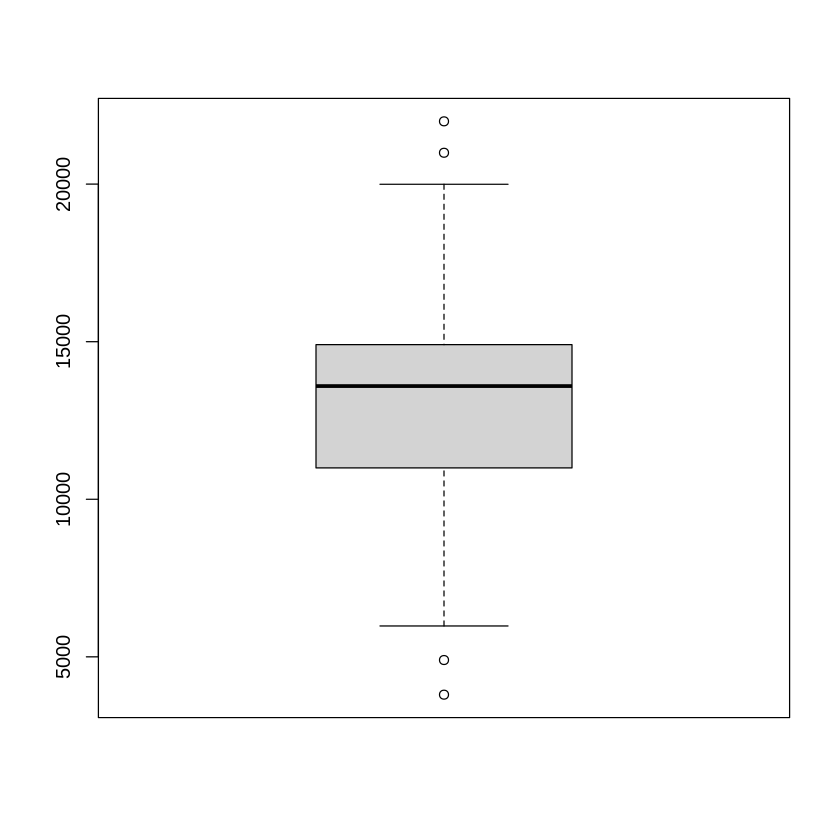

In [5]:
x2 <- boxplot(car$price)

In [6]:
x2$out

[1] 21992 20995  4899  3800

이상치를 포함시켜서 학습을 시켰는데 모델의 정확도가 높지 않다면
이상치를 제거하고 학습을 시켜서 모델의 정확도가 올라가는지 확인해야합니다.


**□ 3. 편향여부 확인** 

평균값과 중앙값을 비교해서 편향여부를 확인할 수 있습니다.

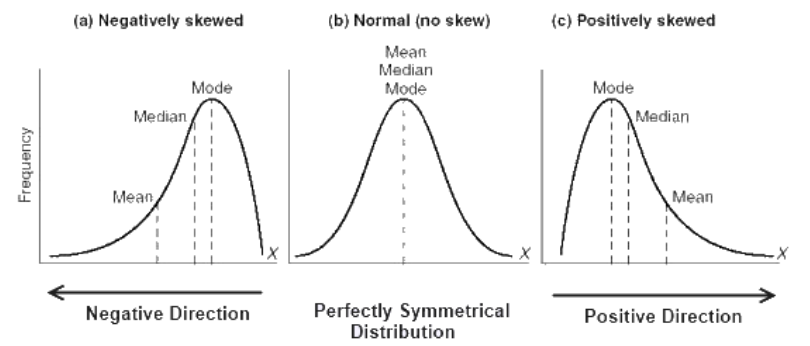

그림출처-https://m.blog.naver.com/bluefish850/220696377742

    평균값 > 중앙값 --> 이상치 때문에 평균이 올라간 것입니다.
			        	데이터가 오른쪽으로 편향이 됩니다.

    평균값 < 중앙값 --> 데이터가 왼쪽으로 편향이 됩니다.

예제: 중고차 가격 데이터의 편향 여부를 확인합니다.

In [7]:
summary(car$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3800   10995   13592   12962   14904   21992 

평균값 : 12962   <   중앙값 : 13592

예제: 중고차의 마일리지(주행거리) 의 편향여부를 확인합니다.

In [8]:
summary(car$mileage)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4867   27200   36385   44261   55124  151479 

평균값 : 44261   >   중앙값 : 36385

설명: 평균값이 중앙값보다 크다면 데이터가 오른쪽으로 편향되었으므로	이상치가 있는지 확인을 해봐야합니다.

In [9]:
outlier(car$mileage)

[1] 151479

**□ 4. 히스토그램 그래프를 확인하여 데이터를 시각화**

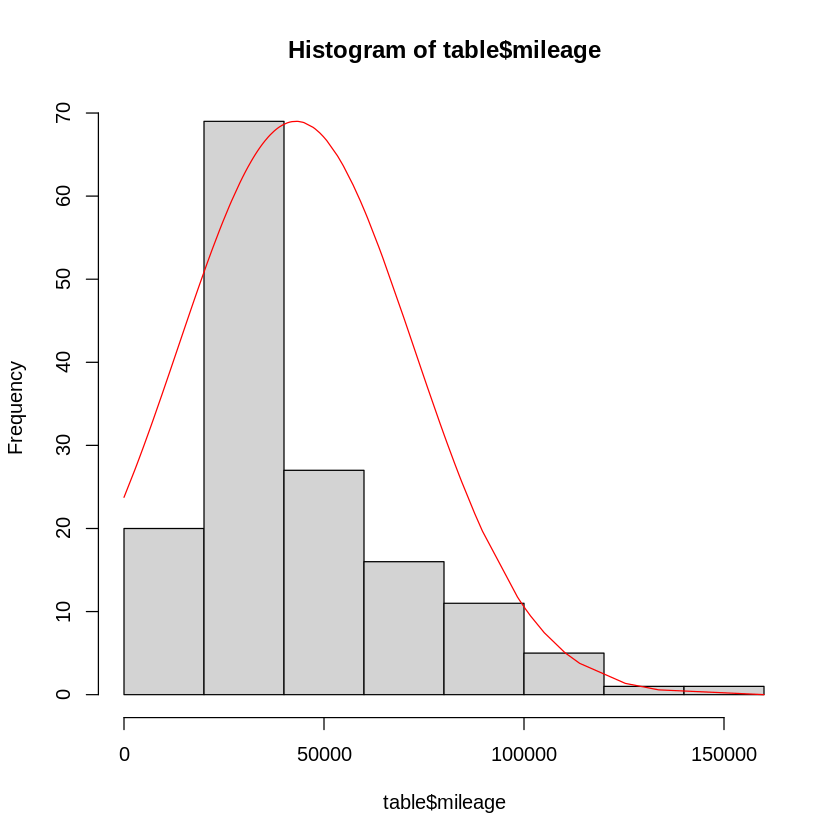

In [21]:
table <- read.csv('usedcars.csv', header=T, stringsAsFactor=F )
class1 <- sort(table$mileage)
hist(table$mileage)
par(new=T)
plot( class1, dnorm( class1, mean=mean(class1), sd=sd(class1)),type='l', axes=FALSE, ann=FALSE, col="red") 

**□ 5. 사분위 그래프**

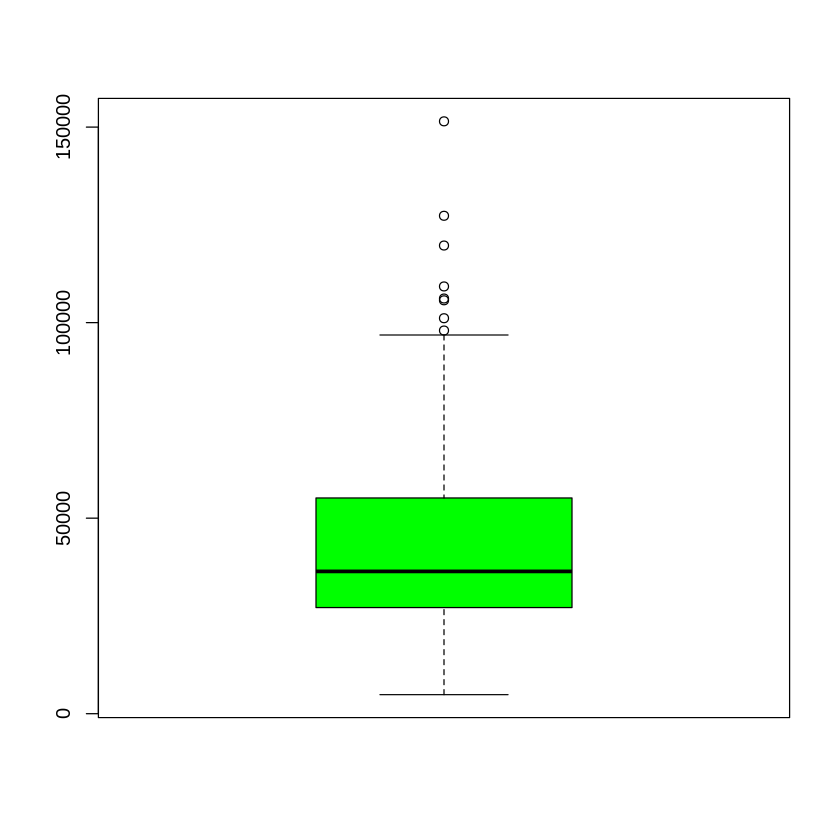

In [22]:
boxplot(table$mileage, col="green", density=80 )

**□ 6. 왜도값, 첨도값**

	 1) 왜도 : 데이터의 좌우로 기울어짐 정도
		왜도값 > 0 : 오른쪽으로 꼬리가 길다
		왜도값 < 0 : 왼쪽으로 꼬리가 길다
		
	
	 2) 첨도 : 위아래 뽀족한 정도
		첨도값이 3에 가까울수록 정규분포에 해당하고
		3보다 작은 경우는 완만한 곡선
		3보다 크면 뾰족한 곡선
    
    가급적 데이터가 정규분포 형태를 보여야 학습이 잘 됩니다.

예제: 중고차의 주행거리의 왜도값을 확인하기

In [23]:
install.packages("fBasics")
library(fBasics)
skewness(car$mileage)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’


Loading required package: timeDate

Loading required package: timeSeries


Attaching package: ‘timeSeries’


The following object is masked from ‘package:outliers’:

    outlier




[1] 1.231805
attr(,"method")
[1] "moment"

왜도값=1.23180499415081 > 0 으로 오른쪽으로 꼬리가 긴 경우 입니다.  
평균값 > 중앙값 경우로 이상치가 평균값을 한쪽 방향으로 잡아끄는 경우입니다.


**□ 7. 산포도 그래프**

두 변수간의 관계를 파악할 때 사용하는 그래프  
특히 두 변수간의 관계가 양의 관계인지 음의 관계인지 파악할 때 유용합니다.

빅데이터 기사시험: 4-51  
두 데이터(변량) 간의 상관관계 유무를 xy 평면상에 시각적으로 나타내는 그림입니다.

예제: 사원 테이블의 커미션과 월급과의 관계를 산포도 그래프로 그리시오 !


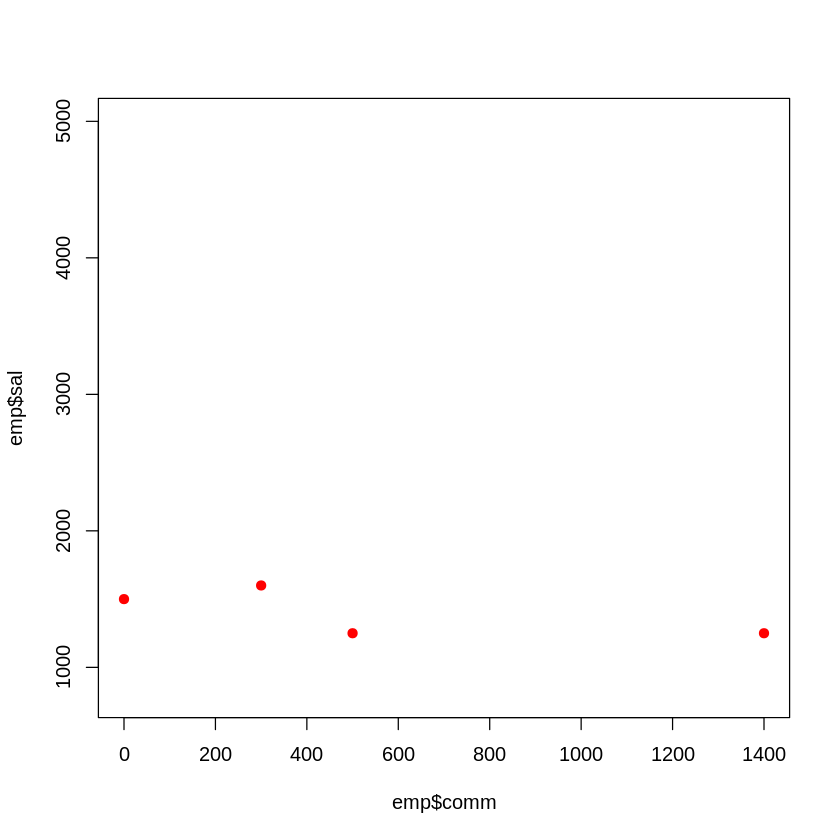

In [26]:
plot( emp$comm,  emp$sal, pch=21, col='red', bg='red')

설명: 그래프를 보면 커미션을 받는 사원들의 월급이 대체적으로 작은것을 확인할 수 있습니다.  
이 사원들의 직업은 SALESMAN 이라서 커미션으로 수익을 올리기 때문이라고 볼 수 있습니다.
	

문제166. 중고차의 주행거리가 높으면 중고차의 가격이 낮아지는지 산포도 그래프로 확인하시오 !


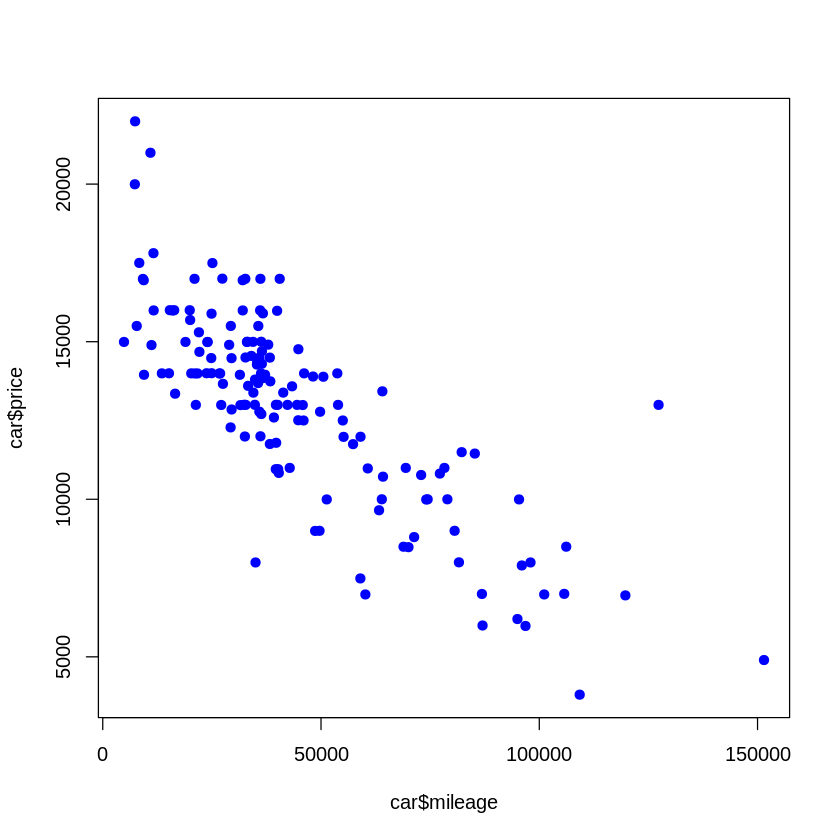

In [27]:
plot( car$mileage, car$price, pch=21, col='blue', bg='blue')

설명: 주행거리가 높을수록 가격이 낮아지는 음의 상관관계를 보이고 있습니다.


In [28]:
cor( car$mileage, car$price )   # 상관계수

[1] -0.8061494

문제167. 산포도 그래프를 자동화 스크립트 7번에 추가하시오 !


In [ ]:
sanpodo <- function() {
       
       fname <- file.choose()
       table <- read.csv(fname, header=T, stringsAsFactor=F )

       print(data.table(colnames(table)))

       xcol_num <- as.numeric(readline('x축 컬럼 번호: '))
       ycol_num <- as.numeric(readline('y축 컬럼 번호: '))      

       xcol <- colnames(table[xcol_num])
       ycol <- colnames(table[ycol_num])

       xcol2 <- table[,xcol]
       ycol2 <- table[,ycol]

       plot(xcol2,ycol2,
       main=paste(xcol,'과',ycol,'의 산포도 그래프'),,lwd=2, xlab=xcol,ylab=ycol,col='blue',pch=21,bg='blue')
                         }

위의 산포도 그래프 스크립트를 자동화 함수에 추가

**■ 2장의 내용**

 1. Factor 를 이해
 2. R 로 데이터를 로드하는 4가지 방법
 3. 수치형 데이터를 관찰하는 7가지 방법  -->  이상치 확인, 데이터의 정규성 확인, 상관관계 확인
 4. 이원교차표 확인하는 방법

**■ 관계의 관찰 : 이원교차표 (책 109 page)**

두 명목 변수간의 관계를 관찰하기 위해 이원 교차표를 사용합니다.
교차표는 하나의 변수값이 다른 변수 값에 의해 어떻게 변하는지 관찰할 수 있다는 점에서
산포도와 비슷합니다.

예: 두 변수간의 관계를 확인하는 기존 방법

In [29]:
attach(emp)
tapply( empno, list(deptno, job), length, default=0)

,ANALYST,CLERK,MANAGER,PRESIDENT,SALESMAN
10,0,1,1,1,0
20,2,2,1,0,0
30,0,1,1,0,4


이원 교차표로 확인하는 방법

In [30]:
install.packages("gmodels")
library(gmodels)
CrossTable(x=emp$deptno, y=emp$job)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’





 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  14 

 
             | emp$job 
  emp$deptno |   ANALYST |     CLERK |   MANAGER | PRESIDENT |  SALESMAN | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
          10 |         0 |         1 |         1 |         1 |         0 |         3 | 
             |     0.429 |     0.024 |     0.198 |     2.881 |     0.857 |           | 
             |     0.000 |     0.333 |     0.333 |     0.333 |     0.000 |     0.214 | 
             |     0.000 |     0.250 |     0.333 |     1.000 |     0.000 |           | 
             |     0.000 |     0.071 |     0.071 |     0.071 |     0.000 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
          20 |    

※ Crosstable 해석 ?

 1. 일반횟수
 2. 카이 제곱 ( 기대치 비율 )
 3. 행을 기준으로 비율 값 ( 가로로 읽는다. )
 4. 컬럼을 기준으로 비율 값 ( 세로로 읽는다. )
 5. 전체를 기준으로 비율 값

해석하는 법 :
표 결과 위에서 아래 순서대로

예: 

In [31]:
CrossTable(x=emp$deptno, y=emp$job, chisq=TRUE)

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  14 

 
             | emp$job 
  emp$deptno |   ANALYST |     CLERK |   MANAGER | PRESIDENT |  SALESMAN | Row Total | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
          10 |         0 |         1 |         1 |         1 |         0 |         3 | 
             |     0.429 |     0.024 |     0.198 |     2.881 |     0.857 |           | 
             |     0.000 |     0.333 |     0.333 |     0.333 |     0.000 |     0.214 | 
             |     0.000 |     0.250 |     0.333 |     1.000 |     0.000 |           | 
             |     0.000 |     0.071 |     0.071 |     0.071 |     0.000 |           | 
-------------|-----------|-----------|-----------|-----------|-----------|-----------|
          20 |    

문제168. 관계를 관찰 할 수 있는 또 다른 척도인 이원 교차표를 이용해서 직업과 월급과의 관계를 관찰하여 직업별로 월급의 차이가 존재하는지 확인하시오 !

월급을 2500을 기준으로 직업별로 각각 월급이 2500 이상인 사원들과 월급이 2500 보다 작은 사원들의 분포를 확인합니다.


In [33]:
install.packages('data.table')
library(data.table)
data.table(emp$sal, emp$sal >= 2500)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



V1,V2
<int>,<lgl>
5000,TRUE
2850,TRUE
2450,FALSE
2975,TRUE
1250,FALSE
1600,FALSE
1500,FALSE
950,FALSE
1250,FALSE


2500 이상이면 TRUE, 미만이면 FALSE



In [34]:
# 파생변수 추가
emp$sal_tf <- emp$sal >= 2500
emp

index,empno,ename,job,mgr,hiredate,sal,comm,deptno,sal_tf
<int>,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<lgl>
1,7839,KING,PRESIDENT,NA,1981-11-17 0:00,5000,NA,10,TRUE
2,7698,BLAKE,MANAGER,7839,1981-05-01 0:00,2850,NA,30,TRUE
3,7782,CLARK,MANAGER,7839,1981-05-09 0:00,2450,NA,10,FALSE
4,7566,JONES,MANAGER,7839,1981-04-01 0:00,2975,NA,20,TRUE
5,7654,MARTIN,SALESMAN,7698,1981-09-10 0:00,1250,1400,30,FALSE
6,7499,ALLEN,SALESMAN,7698,1981-02-11 0:00,1600,300,30,FALSE
7,7844,TURNER,SALESMAN,7698,1981-08-21 0:00,1500,0,30,FALSE
8,7900,JAMES,CLERK,7698,1981-12-11 0:00,950,NA,30,FALSE
9,7521,WARD,SALESMAN,7698,1981-02-23 0:00,1250,500,30,FALSE


설명: emp 테이블에 sal_tf 라는 새로운 컬럼과 데이터를 만들었는데 바로 이 sal_tf 는 기존 데이터로 만든 새로운 파생변수 입니다.


In [36]:
library(gmodels)
CrossTable(emp$job, emp$sal_tf)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  14 

 
             | emp$sal_tf 
     emp$job |     FALSE |      TRUE | Row Total | 
-------------|-----------|-----------|-----------|
     ANALYST |         0 |         2 |         2 | 
             |     1.286 |     2.314 |           | 
             |     0.000 |     1.000 |     0.143 | 
             |     0.000 |     0.400 |           | 
             |     0.000 |     0.143 |           | 
-------------|-----------|-----------|-----------|
       CLERK |         4 |         0 |         4 | 
             |     0.794 |     1.429 |           | 
             |     1.000 |     0.000 |     0.286 | 
             |     0.444 |     0.000 |           | 
             |     0.286 |     0.000 |           | 
-------------|-----------|-----------|-----

문제169. 중고차의 모델별로 색깔이 보수적인 색깔이 많은지 아닌지 이원교차표로 확인하시오 !

    보수적인 색깔 : Black, Gray, Silver, White

In [42]:
car$col_tf <- car$color %in% c("Black", "Gray", "Silver", "White")
library(gmodels)
CrossTable(car$model, car$col_tf)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  150 

 
             | car$col_tf 
   car$model |     FALSE |      TRUE | Row Total | 
-------------|-----------|-----------|-----------|
          SE |        27 |        51 |        78 | 
             |     0.009 |     0.004 |           | 
             |     0.346 |     0.654 |     0.520 | 
             |     0.529 |     0.515 |           | 
             |     0.180 |     0.340 |           | 
-------------|-----------|-----------|-----------|
         SEL |         7 |        16 |        23 | 
             |     0.086 |     0.044 |           | 
             |     0.304 |     0.696 |     0.153 | 
             |     0.137 |     0.162 |           | 
             |     0.047 |     0.107 |           | 
-------------|-----------|-----------|----